In [138]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [139]:
from oop_functions.util_functions import summarize_features, print_df, convert_numeric_to_float16

processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)
processed_data = convert_numeric_to_float16(processed_data)

In [140]:
processed_data['ca125ii_level_binary'] = np.nan
processed_data.loc[processed_data['ca125ii_level'] < 35, 'ca125ii_level_binary'] = 1
processed_data.loc[processed_data['ca125ii_level'] >= 35 , 'ca125ii_level_binary'] = 2

In [141]:
def load_cv_analytics_util_see_stats(filesuffix):
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    return cv_analytics_util

def plot_hist_side_by_side_for_class(df, label, xaxis, normalize = True, title=''):
    # Compute histogram
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    num_bins = 20
    positive_df = df[df[label] == 1]
    bin_edges = np.linspace(0, 1, num_bins + 1)
    hist_positive, bin_edges = np.histogram(positive_df[xaxis], bins=bin_edges)

    negative_df = df[df[label] == 0]
    hist_negative, bin_edges = np.histogram(negative_df[xaxis], bins=bin_edges)
    if normalize:
        hist_positive = hist_positive / sum(hist_positive)
        hist_negative = hist_negative / sum(hist_negative)
    ax.hist([bin_edges[:-1], bin_edges[:-1]], bin_edges, weights=[hist_positive, hist_negative], label=['positive', 'negative'])
    ax.legend(title=label)
    ax.set_ylabel('Class percentage')
    ax.set_xlabel(xaxis)
    plt.title(title)
    plt.show()

def get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years'):
    id_and_confidence = []
    for analytics_util in cv_analytics_util.analytics_utils:
        X_test = analytics_util.data_util.test_df
        X_test_mismatch = X_test.copy()
        y_pred, y_prob = analytics_util.get_predictions() 
        X_test_mismatch[f'{label}_pred'] = y_pred
        X_test_mismatch[f'{label}_prob'] = y_prob
        id_and_confidence.append(X_test_mismatch)
    full_dataset = pd.concat(id_and_confidence)
    return full_dataset

In [142]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
num_folds=15
test_n_folds=15
train_size = 15000

In [143]:
label = f'cancer_in_next_1_years'
filesuffix = f'experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials'
print(filesuffix)
experiment_data_helper: ExperimentDataHelper = ExperimentDataHelperSingleLabelScreenedFirst5(processed_data, label, ['cancer_'], train_size = train_size)
# experiment_data_helper.set_train_size_to_max(num_folds)
experiment_runner = ExperimentRunner(classifier, experiment_data_helper, num_folds=num_folds, test_n_folds=test_n_folds)
cv_analytics_util = experiment_runner.run_experiment()
single_cv_analytics_util = cv_analytics_util
# cv_analytics_util.store_cv_analytics_utils(filesuffix)

experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials
[1.96242526e+01 2.80827299e+00 1.00643800e+01 1.33822889e+01
 1.72708266e+00 4.90621238e-03 1.15884515e+01 3.09483577e+00
 6.27659838e+01 1.42632120e-01 2.50752383e+01 1.26748359e+01
 3.23185091e+00 1.71954839e-01 8.33619893e-01 3.46052268e+00
 1.34135095e-01 4.14954364e-01 1.83644983e-02 3.09332683e+00
 2.81078840e+00 2.10361481e-01 1.76706993e+00 8.80114971e-01
 1.61467811e+01 1.71129651e+00 1.46689701e+05 2.71893539e-01
 2.02458157e+00 3.23334884e+00 1.78425529e+00 1.58708246e-01
 6.18943067e-02 1.51301470e-01 5.52069052e-02 1.59807042e+01
 1.97161016e+00 2.21107627e-01 1.22281899e+01 2.50711611e-01
 2.85340621e-01 7.56819324e-04 9.28299419e-01 1.08844326e+00
 4.03587329e-01 9.35560182e-02 3.18113984e-01 2.69813837e+01
 1.53147567e-02 2.98319328e+00 1.48317973e+00 2.79140797e+00
 8.09801092e-02 4.23453398e-02 1.95592612e-01 5.72804795e-02
 1.98038900e-02 1.41084002e+00 7.83879591e-01 1

In [144]:
# single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')



Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999667 | 0.000156218 | 0.999376  | 0.999822 |
| recall__class_0    | 0.996839 | 0.00101451  | 0.99456   | 0.997874 |
| f1-score__class_0  | 0.99825  | 0.000504104 | 0.997183  | 0.998839 |
| precision__class_1 | 0.123613 | 0.0468506   | 0.0566038 | 0.225806 |
| recall__class_1    | 0.564815 | 0.196255    | 0.222222  | 0.777778 |
| f1-score__class_1  | 0.201117 | 0.072637    | 0.0967742 | 0.35     |
| accuracy           | 0.996509 | 0.00100366  | 0.994386  | 0.997683 |
| auc                | 0.94893  | 0.0378892   | 0.887051  | 0.998755 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


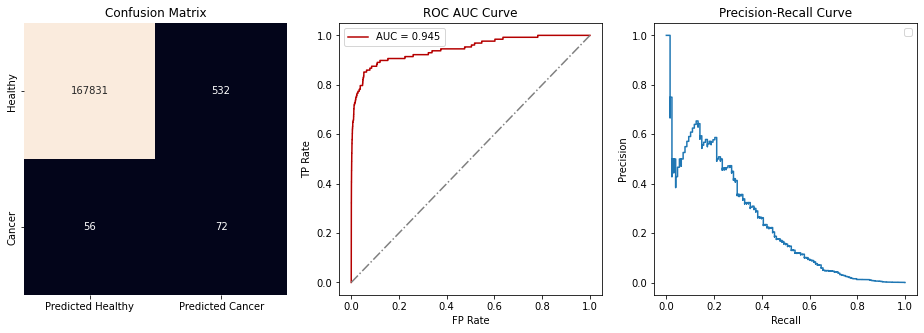

In [145]:
single_cv_analytics_util.get_cv_report();
single_cv_analytics_util.display_graph()

In [146]:
single_test_cols = single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [147]:
len(single_test_cols)

156

In [148]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in single_cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions = pd.concat(id_and_confidence)

In [149]:
label = f'cancer_in_next_1_years'
filesuffix = f'experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials'
print(filesuffix)
experiment_data_helper: ExperimentDataHelper = ExperimentDataHelperScreenedFirst5(processed_data, label, ['cancer_'], train_size = train_size)
# experiment_data_helper.set_train_size_to_max(num_folds)
experiment_runner = ExperimentRunner(classifier, experiment_data_helper, num_folds=num_folds, test_n_folds=test_n_folds)
cv_analytics_util = experiment_runner.run_experiment()
# single_cv_analytics_util = cv_analytics_util
# cv_analytics_util.store_cv_analytics_utils(filesuffix)

experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials
[1.96304088e+01 2.81657667e+00 1.00882699e+01 1.33876403e+01
 1.72743515e+00 4.93509832e-03 1.15904786e+01 3.09647783e+00
 6.27695023e+01 1.42982977e-01 2.50745565e+01 1.26738842e+01
 3.23384228e+00 1.71775744e-01 8.34058382e-01 3.46029693e+00
 1.33570337e-01 4.15251481e-01 1.83342699e-02 3.09287827e+00
 2.81025621e+00 2.09846779e-01 1.76743023e+00 8.80352877e-01
 1.61482687e+01 1.71090353e+00 1.46629207e+05 2.71970150e-01
 2.02345618e+00 3.23274612e+00 1.78485072e+00 1.58693967e-01
 6.19690484e-02 1.51181153e-01 5.51089526e-02 1.59814397e+01
 1.97168474e+00 2.20715088e-01 1.22323829e+01 2.50262553e-01
 2.85260261e-01 7.80470556e-03 9.28267276e-01 1.08936295e+00
 4.03726668e-01 9.33344426e-02 3.18119408e-01 2.69787618e+01
 1.52808326e-02 2.99190939e+00 1.48355708e+00 2.79020208e+00
 8.12203841e-02 4.24807370e-02 1.95522855e-01 5.72378964e-02
 1.97584301e-02 1.41029695e+00 7.84452364e-01 1.786421

In [150]:
# cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [151]:
# cv_analytics_util.store_cv_results()

In [152]:
test_cols = cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [153]:
for col in test_cols:
    if col not in single_test_cols:
        print(col)

In [154]:
processed_data[processed_data['ovar_cancer_years']  < processed_data['ovar_observe_year']][['ovar_cancer_years', 'study_yr', 'cancer_in_next_1_years', 'ovar_observe_year']]

,ovar_cancer_years,study_yr,cancer_in_next_1_years,ovar_observe_year


In [155]:
# TODO: fix this one

In [156]:
cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols == single_cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols

True

In [157]:
full_dataset_single_original = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

In [158]:
processed_data = experiment_data_helper.source_df

In [159]:
# Create a copy of the whole dataset
label = 'cancer_in_next_1_years'
full_dataset = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df
    full_dataset.append(X_test.copy())
full_dataset = pd.concat(full_dataset)
processed_data = processed_data[full_dataset.columns]
full_dataset = processed_data[processed_data[id_col].isin(full_dataset[id_col])]


In [160]:
df_1 = single_cv_analytics_util.analytics_utils[0].data_util.test_df

In [161]:
df_1[df_1['cancer_in_next_1_years'] == 1][['index']]

,index
228,104.0
1412,116523.0
3046,1466.0
3188,191453.0
3777,79069.0
4414,117192.0
4752,154676.0
7808,79967.0
9633,155752.0


In [162]:
# single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns == full_dataset.columns

In [163]:
single_cv_analytics_util.analytics_utils[0].data_util.imputer.imputer_mean.statistics_[-61]

0.5489442516088053

In [164]:
# single_cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols

In [165]:
# full_dataset = full_dataset_single_original

In [ ]:
# TODO: make sure that the original records stay the same and we just add new ones 249 new ones to be exact

In [166]:
# Add those records to the test datasets of the single label dataset and test its validity
for analytics_util in single_cv_analytics_util.analytics_utils:
    # print(analytics_util.data_util.test_df.shape)
    idx = analytics_util.data_util.test_df['plco_id'].to_list()
    # print((full_dataset[full_dataset['plco_id'].isin(idx)].shape))
    analytics_util.data_util.test_df = full_dataset[full_dataset['plco_id'].isin(idx)]
    analytics_util.data_util.test_df = analytics_util.data_util.imputer.imputer_transform(analytics_util.data_util.test_df)


In [167]:
df_2 = single_cv_analytics_util.analytics_utils[0].data_util.test_df

In [168]:
processed_data[processed_data['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
3767,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,NaN,1.0,127.0,118.0,125.0


In [169]:
df_1[df_1['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
3732,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0,0,0,0,10.06438,1.0,127.0,118.0,125.0


In [170]:
df_2[df_2['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
3767,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0,0,0,0,10.06438,1.0,127.0,118.0,125.0


In [171]:
# Add those records to the test datasets of the single label dataset and test its validity
# for analytics_util in single_cv_analytics_util.analytics_utils:
#     idx = analytics_util.data_util.train_df['index'].to_list()
#     analytics_util.data_util.train_df = full_dataset[full_dataset['index'].isin(idx)]
#     analytics_util.data_util.train_df = analytics_util.data_util.imputer.imputer_transform(analytics_util.data_util.train_df)
#     analytics_util.fit()




Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999483 | 0.000155263 | 0.999282  | 0.999821 |
| recall__class_0    | 0.996808 | 0.00102964  | 0.994389  | 0.997877 |
| f1-score__class_0  | 0.998143 | 0.000511844 | 0.997098  | 0.998672 |
| precision__class_1 | 0.073045 | 0.0350958   | 0.0181818 | 0.125    |
| recall__class_1    | 0.322222 | 0.188705    | 0.111111  | 0.777778 |
| f1-score__class_1  | 0.117832 | 0.0567987   | 0.03125   | 0.2      |
| accuracy           | 0.996295 | 0.00101901  | 0.994216  | 0.997348 |
| auc                | 0.810708 | 0.110197    | 0.579217  | 0.984551 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


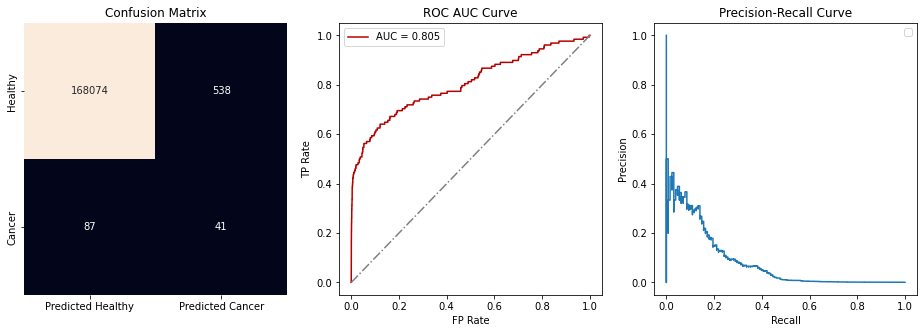

In [172]:
single_cv_analytics_util.update_thresholds(0.5)
single_cv_analytics_util.get_cv_report();
single_cv_analytics_util.display_graph()

In [173]:
full_dataset_single_new = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

In [174]:
plco_id = 264670

In [175]:
full_dataset_single_new[full_dataset_single_new['cancer_in_next_1_years_prob'] > 0.9]['index']

228          104.0
640       116348.0
801        78390.0
2885       78860.0
3065        1466.0
            ...   
167061     77016.0
167062    115612.0
167063    153058.0
168200    190401.0
169064     77916.0
Name: index, Length: 166, dtype: float64

In [176]:
col_list = []

In [177]:
processed_data[processed_data['index'] == plco_id][list(set(col_list) - set(['cancer_in_next_1_years_pred', 'cancer_in_next_1_years_prob']))]

""
169564


In [188]:
len(full_dataset_single_original) - len(full_dataset_single_new)

-249

In [178]:
full_dataset_single_original.index = full_dataset_single_original['index'].to_list()

In [179]:
full_dataset_single_original[full_dataset_single_original['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
264670.0,Z-159316-1,60.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,...,0,0,0,10.202633,1.0,145.0,160.0,170.0,0,0.000246


In [180]:
full_dataset_single_new.index = full_dataset_single_new['index'].to_list()

In [181]:
full_dataset_single_new[full_dataset_single_new['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
264670.0,Z-159316-1,60.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,...,0,0,0,10.202633,1.0,145.0,160.0,170.0,0,0.000246


In [182]:
# TODO: Not propagated?

In [183]:
for col in full_dataset_single_new.columns:
    if full_dataset_single_new.loc[plco_id, col] != full_dataset_single_original.loc[plco_id, col]:
        col_list.append(col)
        print(f"{col}: {full_dataset_single_new.loc[plco_id, col]} {full_dataset_single_original.loc[plco_id, col]}")

In [184]:
# id_col = 'index'
# label = 'cancer_in_next_1_years'
# id_and_confidence = []
# for analytics_util in cv_analytics_util.analytics_utils:
#     X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
#     X_test_mismatch = X_test.copy()
#     y_pred, y_prob = analytics_util.get_predictions() 
#     X_test_mismatch[f'{label}_pred'] = y_pred
#     X_test_mismatch[f'{label}_prob'] = y_prob
#     X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
#     X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
#     id_and_confidence.append(X_test_mismatch)
# mid_conf_predictions_2 = pd.concat(id_and_confidence)

In [185]:

# full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
# plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
# full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
# plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')

# full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
# full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')